# BASE 1719

Information:
* Periodo: 2017-2019
* Objetivo: predicción de pobreza

## 1. Importar datos y librerias

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [28]:
import pandas as pd
import numpy as np
import pickle
import joblib
import matplotlib.pyplot as plt

In [3]:
path = r'..\..\input\vl\preprocessed_data\base17_19_anualizada_hogares.dta'
data_original = pd.read_csv( path )

In [4]:
data_original.shape

(34584, 200)

In [5]:
data_original

,conglome,vivienda,hogar,p300a_t,p301a_t,p301d_t,p303_t,p306_t,p310_t,p310b1_t,...,p1175_12_t,p1175_13_t,p1175_14_t,p1175_15_t,t110_t,gasto_monetario_deflactado,gasto_bruto_deflactado,gashog1d,gashog2d,region
0,5001,2,11,4.0,6.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,0,2,276.111500,368.075100,28682.766761,38236.044552,1
1,5001,23,11,4.0,5.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,2,1,88.087260,125.934160,9150.600633,13082.178226,1
2,5001,35,11,4.0,3.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,2,1,64.939300,100.953470,6745.965384,10487.156982,1
3,5001,46,11,4.0,6.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,2,2,143.894700,286.947780,14947.937984,29808.449931,1
4,5001,67,11,4.0,3.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,0,2,59.929256,66.743935,6225.516580,6933.432594,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34579,10801,9,11,4.0,9.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,1,294.939800,425.381160,32074.329786,46259.667570,23
34580,10801,19,11,4.0,10.0,2.0,2.0,2.0,2.0,2.0,...,0,0,0,0,1,143.342380,237.430820,15588.303651,25820.303651,23
34581,10801,25,11,4.0,10.0,2.0,1.0,2.0,1.0,2.0,...,0,0,0,0,1,212.797640,218.342530,23141.476173,23744.476173,23
34582,10801,30,11,4.0,10.0,1.0,2.0,2.0,2.0,2.0,...,0,0,0,0,1,239.535250,458.516100,26049.156966,49863.050304,23


### 2. Preprocesar datos

In [6]:
# # Imputación de valores del gasto del percentil 1% superior con valores del percentil 99

# percentil_superior = 0.01
# perc = data_original[ 'gasto_deflactado' ].quantile( 1 - percentil_superior )
# data.loc[ data_original [ 'gasto_deflactado' ] > perc, 'gasto_deflactado' ] = perc

In [7]:
next_vars = [ 'gasto_monetario_deflactado', 'gasto_bruto_deflactado', 
              'region', 'conglome',	'vivienda',	'hogar',
              'gashog1d', 'gashog2d' ]
data      = data_original.drop(  next_vars , axis = 1 )

In [8]:
data = data.rename(columns = { 'ocu500_t_2': 'ocu500_t_2.0', 
                               'ocu500_t_1': 'ocu500_t_1.0',
                               'ocu500_t_4': 'ocu500_t_4.0',
                               'ocu500_t_3': 'ocu500_t_3.0',
                               'ocu500_t_0': 'ocu500_t_0.0' } )

### 3. Importar modelos entrenados y predecir

In [9]:
rf_optimal_model_o = joblib.load( r'..\..\output\ejecucion_2\models\base_17_19\base_17_19_xgb_nrs.joblib' )

y_rf_pred_class_o  = rf_optimal_model_o.predict( data )
y_rf_pred_prob_o   = rf_optimal_model_o.predict_proba( data )[ :, 1 ]

In [10]:
y_rf_pred_prob_o

array([0.03666018, 0.5939412 , 0.2471458 , ..., 0.02759312, 0.0020578 ,
       0.00633319], dtype=float32)

### 4. Identificar hogares vulnerables

In [18]:
data_completa = data_original.copy( deep = True )

data_completa[ 'class_pobreza' ] = y_rf_pred_class_o
data_completa[ 'prob_pobreza' ]  = y_rf_pred_prob_o

In [24]:
data_completa[ 'class_pobreza' ].value_counts( normalize = True )*100

0    61.892783
1    38.107217
Name: class_pobreza, dtype: float64

In [25]:
data_completa[ 'prob_pobreza' ]

0        0.036660
1        0.593941
2        0.247146
3        0.473719
4        0.748970
           ...   
34579    0.171063
34580    0.004022
34581    0.027593
34582    0.002058
34583    0.006333
Name: prob_pobreza, Length: 34584, dtype: float32

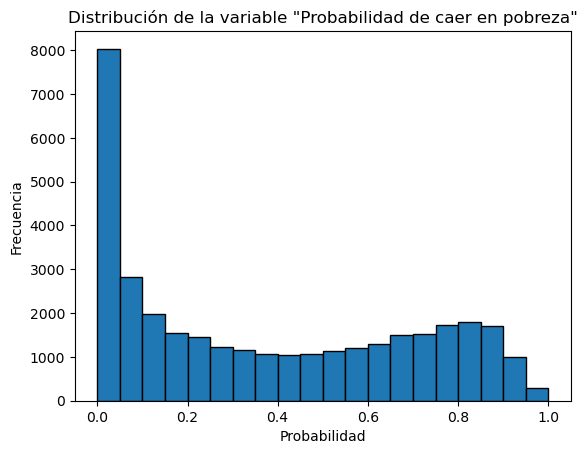

In [27]:
plt.hist( data_completa[ 'prob_pobreza' ], 
          bins = 20, 
          range = (0, 1), 
          edgecolor = 'black' )

plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable "Probabilidad de caer en pobreza"')
plt.show()

Se considera distintas amplitudes de caliper: 
* 1: +-   2 con respecto a 0.9 (absoluto)
* 2: +-   1 con respecto a 0.9 (absoluto)
* 3: +- 0.5 con respecto a 0.9 (absoluto)

In [19]:
limite_min_1 = 0.070
limite_max_1 = 0.110

limite_min_2 = 0.080
limite_max_2 = 0.100

limite_min_3 = 0.085
limite_max_3 = 0.095

hogares_vulnerables_1 = data_completa[ ( data_completa[ 'prob_pobreza' ] >= limite_min_1 ) & ( data_completa[ 'prob_pobreza' ] <= limite_max_1 ) ]
hogares_vulnerables_2 = data_completa[ ( data_completa[ 'prob_pobreza' ] >= limite_min_2 ) & ( data_completa[ 'prob_pobreza' ] <= limite_max_2 ) ]
hogares_vulnerables_3 = data_completa[ ( data_completa[ 'prob_pobreza' ] >= limite_min_3 ) & ( data_completa[ 'prob_pobreza' ] <= limite_max_3 ) ]

### 5. Calcular la línea de vulnerabilidad

In [20]:
linea_vul_1_gmd = hogares_vulnerables_1[ 'gasto_monetario_deflactado' ].mean()
linea_vul_1_gbd = hogares_vulnerables_1[ 'gasto_bruto_deflactado' ].mean()
linea_vul_1_gm  = hogares_vulnerables_1[ 'gashog1d' ].mean()
linea_vul_1_gb  = hogares_vulnerables_1[ 'gashog2d' ].mean()

In [21]:
linea_vul_2_gmd = hogares_vulnerables_2[ 'gasto_monetario_deflactado' ].mean()
linea_vul_2_gbd = hogares_vulnerables_2[ 'gasto_bruto_deflactado' ].mean()
linea_vul_2_gm  = hogares_vulnerables_2[ 'gashog1d' ].mean()
linea_vul_2_gb  = hogares_vulnerables_2[ 'gashog2d' ].mean()

In [22]:
linea_vul_3_gmd = hogares_vulnerables_3[ 'gasto_monetario_deflactado' ].mean()
linea_vul_3_gbd = hogares_vulnerables_3[ 'gasto_bruto_deflactado' ].mean()
linea_vul_3_gm  = hogares_vulnerables_3[ 'gashog1d' ].mean()
linea_vul_3_gb  = hogares_vulnerables_3[ 'gashog2d' ].mean()

In [23]:
table = np.zeros( ( 3, 4 ) )

table[ 0 ] = [ linea_vul_1_gmd, linea_vul_1_gbd, linea_vul_1_gm, linea_vul_1_gb ]
table[ 1 ] = [ linea_vul_2_gmd, linea_vul_2_gbd, linea_vul_2_gm, linea_vul_2_gb ]
table[ 2 ] = [ linea_vul_3_gmd, linea_vul_3_gbd, linea_vul_3_gm, linea_vul_3_gb ]

colnames = [ 'Gasto Monetario Deflactado', 'Gasto Bruto Deflactado', 'Gasto Monetario', 'Gasto Bruto' ]

rownames = [ 'Cáliper +- 2', 
             'Cáliper +- 1', 
             'Cáliper +- 0.5' ]

table_all = pd.DataFrame( table, columns = colnames )
table_all.index = rownames

table_all = table_all.round( 3 )
table_all

,Gasto Monetario Deflactado,Gasto Bruto Deflactado,Gasto Monetario,Gasto Bruto
Cáliper +- 2,215.896,279.939,23494.289,30481.252
Cáliper +- 1,217.120,278.456,23633.876,30311.506
Cáliper +- 0.5,211.347,273.464,23052.336,29821.965
